In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import GridSearchCV

## Tree Based classifiers

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import auc

import pyrsm as rsm

In [2]:
data = pd.read_csv("./fraudData.csv")

In [3]:
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [4]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
data = data.drop(columns = ['Unnamed: 0'])

In [6]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [7]:
# !pip install pandas_profiling

In [8]:
# import pandas_profiling

In [9]:
# data.profile_report()

In [10]:
data.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [11]:
data_sample = data.sample(frac=0.40,replace = True)

In [12]:
data_sample.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [13]:
data_sample["GenderMale"] = rsm.ifelse(data_sample.gender == "M",1,0)

In [14]:
data_sample['is_fraud'].value_counts()

0    221451
1       837
Name: is_fraud, dtype: int64

In [15]:
data_sample.dtypes

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
GenderMale                 int64
dtype: object

In [16]:
data_numeric = data_sample.loc[:,data_sample.dtypes!= np.object]

/tmp/ipykernel_4458/1444919491.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_numeric = data_sample.loc[:,data_sample.dtypes!= np.object]


In [17]:
data_numeric.head()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,GenderMale
401788,4561368699336875,100.86,29324,34.9906,-81.8327,167,1385432954,35.888305,-81.282959,0,0
147911,342952484382519,50.03,6024,42.0158,-73.2913,647,1376235829,42.969745,-73.788808,0,0
29204,3595192916105588,90.66,28314,35.0583,-79.0080,238602,1372621124,35.134708,-78.420797,0,1
469791,676248282243,127.75,33909,26.6939,-81.9452,156391,1386927851,27.332978,-82.522339,0,0
247578,180094608895855,110.68,97492,43.7575,-122.4810,597,1379625287,42.992136,-123.073370,0,0


#### Splitting the data in train, test

In [18]:
X = data_numeric.drop(['cc_num', 'is_fraud'], axis = 1)
y = data_numeric['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state= 42)

#### Standardizing


##### RobustScaler is used as this is better than Standard Scaler when using on a large Dataset as it Scales data as per IQR thus tends to provide better results than a StandardScaler as it handles outliers more robustly

In [19]:
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Decision Tree w/o Hyperparameter tuning


In [20]:
dt = DecisionTreeClassifier(random_state=42)
# Train
dt.fit(X_train,y_train)
# Predict
dt_pred = dt.predict(X_test)

print(confusion_matrix(y_test,dt_pred))

print('\n')
print(classification_report(y_test,dt_pred))

[[66284   130]
 [  159   114]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66414
           1       0.47      0.42      0.44       273

    accuracy                           1.00     66687
   macro avg       0.73      0.71      0.72     66687
weighted avg       1.00      1.00      1.00     66687



In [21]:
dt_Recall = recall_score(y_test, dt_pred)
dt_Precision = precision_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)

dtdf = [(dt_Recall, dt_Precision, dt_f1, dt_accuracy)]

dt_score = pd.DataFrame(data = dtdf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
dt_score.insert(0, 'Decision Tree', 'w/o GridSearch & CV')
dt_score

,Decision Tree,Recall,Precision,F1 Score,Accuracy
0,w/o GridSearch & CV,0.417582,0.467213,0.441006,0.995666


In [22]:
print (dt.score(X_train,y_train))
print(dt.score(X_test,y_test))

1.0
0.9956663217718595


In [23]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [24]:
model_probs = pd.DataFrame(dt.predict_proba(X_test)[:, 1], columns = ['DT'])

In [25]:
fpr, tpr, _ = roc_curve(y_test,  model_probs['DT'])
auc = roc_auc_score(y_test, model_probs['DT'])

In [26]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

In [27]:
result_table = result_table.append({'classifiers':'DT',
                    'fpr':fpr, 
                    'tpr':tpr, 
                    'auc':auc}, ignore_index=True)


/tmp/ipykernel_4458/1845363342.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':'DT',


#### Random Forest w/o Hyperparameter tuning


In [29]:
rf = RandomForestClassifier(n_estimators=200,random_state=42)

rf.fit(X_train,y_train)

rf_pred = rf.predict(X_test)

print(confusion_matrix(y_test,rf_pred))
print('\n')
print(classification_report(y_test,rf_pred))

[[66398    16]
 [  160   113]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66414
           1       0.88      0.41      0.56       273

    accuracy                           1.00     66687
   macro avg       0.94      0.71      0.78     66687
weighted avg       1.00      1.00      1.00     66687



In [30]:
rf_Recall = recall_score(y_test, rf_pred)
rf_Precision = precision_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

rfdf = [(rf_Recall, rf_Precision, rf_f1, rf_accuracy)]

rf_score = pd.DataFrame(data = rfdf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
rf_score.insert(0, 'Random Forest', 'w/o GridSearch & CV')
rf_score

,Random Forest,Recall,Precision,F1 Score,Accuracy
0,w/o GridSearch & CV,0.413919,0.875969,0.562189,0.997361


In [31]:
print (rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

1.0
0.9973608049544889


In [32]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [33]:
model_probs['RF'] = rf.predict_proba(X_test)[:, 1]

In [34]:
fpr, tpr, _ = roc_curve(y_test,  model_probs['RF'])
auc = roc_auc_score(y_test, model_probs['RF'])

In [35]:
result_table= result_table.append({'classifiers':'RF',
                    'fpr':fpr, 
                    'tpr':tpr, 
                    'auc':auc}, ignore_index=True)

/tmp/ipykernel_4458/1587168915.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table= result_table.append({'classifiers':'RF',


#### AdaBoost w/o Hyperparameter tuning


In [36]:
ada = AdaBoostClassifier(n_estimators=200,random_state=42)
ada.fit(X_train,y_train)

ada_pred = ada.predict(X_test)

print(confusion_matrix(y_test,ada_pred))
print('\n')
print(classification_report(y_test,ada_pred))

[[66372    42]
 [  207    66]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66414
           1       0.61      0.24      0.35       273

    accuracy                           1.00     66687
   macro avg       0.80      0.62      0.67     66687
weighted avg       1.00      1.00      1.00     66687



In [37]:
ada_Recall = recall_score(y_test, ada_pred)
ada_Precision = precision_score(y_test, ada_pred)
ada_f1 = f1_score(y_test, ada_pred)
ada_accuracy = accuracy_score(y_test, ada_pred)

adadf = [(ada_Recall, ada_Precision, ada_f1, ada_accuracy)]

ada_score = pd.DataFrame(data = adadf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
ada_score.insert(0, 'AdaBoost', 'w/o GridSearch & CV')
ada_score

,AdaBoost,Recall,Precision,F1 Score,Accuracy
0,w/o GridSearch & CV,0.241758,0.611111,0.346457,0.996266


In [38]:
print (ada.score(X_train,y_train))
print(ada.score(X_test,y_test))

0.9966131323063476
0.9962661388276576


In [39]:
ada.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 200,
 'random_state': 42}

In [40]:
model_probs['Ada'] = ada.predict_proba(X_test)[:, 1]

In [41]:
fpr, tpr, _ = roc_curve(y_test,  model_probs['Ada'])
auc = roc_auc_score(y_test, model_probs['Ada'])

In [42]:
result_table= result_table.append({'classifiers':'Ada',
                    'fpr':fpr, 
                    'tpr':tpr, 
                    'auc':auc}, ignore_index=True)

/tmp/ipykernel_4458/2058489420.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table= result_table.append({'classifiers':'Ada',


#### XGB w/o Hyperparameter tuning

In [43]:
xgbc = xgb.XGBClassifier(n_estimators=200,
                         max_depth=2,
                         eval_metric="auc",
                         random_state=42).fit(X_train,y_train, verbose=True)


xgb_pred = xgbc.predict(X_test)

print(confusion_matrix(y_test,xgb_pred))
print('\n')
print(classification_report(y_test,xgb_pred))

[[66396    18]
 [  205    68]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66414
           1       0.79      0.25      0.38       273

    accuracy                           1.00     66687
   macro avg       0.89      0.62      0.69     66687
weighted avg       1.00      1.00      1.00     66687



In [44]:
xgb_Recall = recall_score(y_test, xgb_pred)
xgb_Precision = precision_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

xgbdf = [(xgb_Recall, xgb_Precision, xgb_f1, xgb_accuracy)]

xgb_score = pd.DataFrame(data = xgbdf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
xgb_score.insert(0, 'XGBoost', 'w/o GridSearch & CV')
xgb_score

,XGBoost,Recall,Precision,F1 Score,Accuracy
0,w/o GridSearch & CV,0.249084,0.790698,0.37883,0.996656


In [45]:
print (xgbc.score(X_train,y_train))
print(xgbc.score(X_test,y_test))

0.9975964164754725
0.9966560199139263


In [46]:
xgbc.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'auc',
 'feature_types': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_threshold': 64,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 2,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 200,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [47]:
model_probs['XGB'] = xgbc.predict_proba(X_test)[:, 1]

In [48]:
fpr, tpr, _ = roc_curve(y_test,  model_probs['XGB'])
auc = roc_auc_score(y_test, model_probs['XGB'])

In [49]:
result_table= result_table.append({'classifiers':'XGB',
                    'fpr':fpr, 
                    'tpr':tpr, 
                    'auc':auc}, ignore_index=True)

/tmp/ipykernel_4458/1733270084.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table= result_table.append({'classifiers':'XGB',


#### Decision Tree with CV & Hyperparameter Tuning

In [50]:
kf = StratifiedKFold(n_splits=5, shuffle=False)

In [51]:
dt_cv = DecisionTreeClassifier(random_state=42)

# score = cross_val_score(dt_cv,X_train,y_train, cv = kf, scoring = 'roc_auc')

# print("Cross Validation AUC scores: {}".format(score))
# print("Avg Cross Validation AUC score is: {}".format(score.mean()))

In [52]:
params = {
    'criterion': ['gini','entropy'],
    'max_depth': list(range(1, 4))
}
grid_dt = GridSearchCV(dt_cv, param_grid=params,scoring = 'roc_auc', cv = kf, n_jobs = 4, refit = "AUC", verbose = 5
                      ).fit(X_train,y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [53]:
print("Best Parameters:", grid_dt.best_params_)
print("Best Score", grid_dt.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 3}
Best Score 0.9310687221392475


In [54]:
dt_cv_pred = grid_dt.predict(X_test)

print(confusion_matrix(y_test,dt_cv_pred))

print('\n')
print(classification_report(y_test,dt_cv_pred))

[[66414     0]
 [  273     0]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66414
           1       0.00      0.00      0.00       273

    accuracy                           1.00     66687
   macro avg       0.50      0.50      0.50     66687
weighted avg       0.99      1.00      0.99     66687



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
dt_cv_Recall = recall_score(y_test, dt_cv_pred)
dt_cv_Precision = precision_score(y_test, dt_cv_pred)
dt_cv_f1 = f1_score(y_test, dt_cv_pred)
dt_cv_accuracy = accuracy_score(y_test, dt_cv_pred)

dt_cv_df = [(dt_cv_Recall, dt_cv_Precision, dt_cv_f1, dt_cv_accuracy)]

dt_cv_score = pd.DataFrame(data = dt_cv_df, columns=['Recall','Precision','F1 Score', 'Accuracy'])
dt_cv_score.insert(0, 'Decision Tree', 'with GridSearch & CV')
dt_cv_score

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Decision Tree,Recall,Precision,F1 Score,Accuracy
0,with GridSearch & CV,0.0,0.0,0.0,0.995906


In [56]:
print (grid_dt.score(X_train,y_train))
print(grid_dt.score(X_test,y_test))

0.9464566614320433
0.9437859046224751


In [57]:
model_probs['DT_cv'] = grid_dt.predict_proba(X_test)[:, 1]

In [58]:
fpr, tpr, _ = roc_curve(y_test,  model_probs['DT_cv'])
auc = roc_auc_score(y_test, model_probs['DT_cv'])

In [59]:
result_table= result_table.append({'classifiers':'DT_cv',
                    'fpr':fpr, 
                    'tpr':tpr, 
                    'auc':auc}, ignore_index=True)

/tmp/ipykernel_4458/1762803716.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table= result_table.append({'classifiers':'DT_cv',


#### Random Forest with CV & Hyperparameter Tuning

In [60]:
rf_cv = RandomForestClassifier(random_state=42)
# score = cross_val_score(rf_cv,X_train,y_train, cv = kf, scoring = 'roc_auc')

# print("Cross Validation AUC scores: {}".format(score))
# print("Avg Cross Validation AUC score is: {}".format(score.mean()))

In [61]:
params = {
    'n_estimators': list(range(100, 401, 100)),
    'max_features': ['sqrt','log2']
}
grid_rf = GridSearchCV(rf_cv, param_grid=params,scoring = 'roc_auc', cv = kf,n_jobs = 4,refit = "AUC",verbose=5,
                      ).fit(X_train,y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [62]:
print("Best Parameters:", grid_rf.best_params_)
print("Best Score", grid_rf.best_score_)

Best Parameters: {'max_features': 'sqrt', 'n_estimators': 400}
Best Score 0.970404876234787


In [63]:
rf_cv_pred = grid_rf.predict(X_test)

print(confusion_matrix(y_test,rf_cv_pred))

print('\n')
print(classification_report(y_test,rf_cv_pred))

[[66398    16]
 [  162   111]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66414
           1       0.87      0.41      0.55       273

    accuracy                           1.00     66687
   macro avg       0.94      0.70      0.78     66687
weighted avg       1.00      1.00      1.00     66687



In [64]:
rf_cv_Recall = recall_score(y_test, rf_cv_pred)
rf_cv_Precision = precision_score(y_test, rf_cv_pred)
rf_cv_f1 = f1_score(y_test, rf_cv_pred)
rf_cv_accuracy = accuracy_score(y_test, rf_cv_pred)

rf_cv_df = [(rf_cv_Recall, rf_cv_Precision, rf_cv_f1, rf_cv_accuracy)]

rf_cv_score = pd.DataFrame(data = rf_cv_df, columns=['Recall','Precision','F1 Score', 'Accuracy'])
rf_cv_score.insert(0, 'Random Forest', 'with GridSearch & CV')
rf_cv_score

,Random Forest,Recall,Precision,F1 Score,Accuracy
0,with GridSearch & CV,0.406593,0.874016,0.555,0.997331


In [65]:
print (grid_rf.score(X_train,y_train))
print(grid_rf.score(X_test,y_test))

1.0
0.9611738654335095


In [66]:
model_probs['RF_cv'] = grid_rf.predict_proba(X_test)[:, 1]

In [67]:
fpr, tpr, _ = roc_curve(y_test,  model_probs['RF_cv'])
auc = roc_auc_score(y_test, model_probs['RF_cv'])

In [68]:
result_table= result_table.append({'classifiers':'RF_cv',
                    'fpr':fpr, 
                    'tpr':tpr, 
                    'auc':auc}, ignore_index=True)

/tmp/ipykernel_4458/3135785514.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table= result_table.append({'classifiers':'RF_cv',


#### AdaBoost with CV & Hyperparameter Tuning

In [69]:
ada_cv = AdaBoostClassifier(random_state=42)
params = {
    'n_estimators': [50,100,200]
}

grid_ada = GridSearchCV(ada_cv, param_grid=params,scoring = 'roc_auc', cv = kf ,n_jobs = 4, refit = "AUC", verbose=5).fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [70]:
print("Best Parameters:", grid_ada.best_params_)
print("Best Score", grid_ada.best_score_)

Best Parameters: {'n_estimators': 200}
Best Score 0.9612159996796823


In [71]:
ada_cv_pred = grid_ada.predict(X_test)

print(confusion_matrix(y_test,ada_cv_pred))

print('\n')
print(classification_report(y_test,ada_cv_pred))

[[66372    42]
 [  207    66]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66414
           1       0.61      0.24      0.35       273

    accuracy                           1.00     66687
   macro avg       0.80      0.62      0.67     66687
weighted avg       1.00      1.00      1.00     66687



In [72]:
ada_cv_Recall = recall_score(y_test, ada_cv_pred)
ada_cv_Precision = precision_score(y_test, ada_cv_pred)
ada_cv_f1 = f1_score(y_test, ada_cv_pred)
ada_cv_accuracy = accuracy_score(y_test, ada_cv_pred)

ada_cv_df = [(ada_cv_Recall, ada_cv_Precision, ada_cv_f1, ada_cv_accuracy)]

ada_cv_score = pd.DataFrame(data = ada_cv_df, columns=['Recall','Precision','F1 Score', 'Accuracy'])
ada_cv_score.insert(0, 'AdaBoost', 'with GridSearch & CV')
ada_cv_score

,AdaBoost,Recall,Precision,F1 Score,Accuracy
0,with GridSearch & CV,0.241758,0.611111,0.346457,0.996266


In [73]:
print (grid_ada.score(X_train,y_train))
print(grid_ada.score(X_test,y_test))

0.9873995990067254
0.9633794222962169


In [74]:
model_probs['AdaBoost_cv'] = grid_ada.predict_proba(X_test)[:, 1]

In [75]:
fpr, tpr, _ = roc_curve(y_test,  model_probs['AdaBoost_cv'])
auc = roc_auc_score(y_test, model_probs['AdaBoost_cv'])

In [76]:
result_table= result_table.append({'classifiers':'AdaBoost_cv',
                    'fpr':fpr, 
                    'tpr':tpr, 
                    'auc':auc}, ignore_index=True)

/tmp/ipykernel_4458/1531079689.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table= result_table.append({'classifiers':'AdaBoost_cv',


#### XGBoost with CV & Hyperparameter Tuning

In [77]:
xgbc_cv = xgb.XGBClassifier(random_state=42)

params = {
    'n_estimators': list(range(100, 801, 100)),
    'max_depth': list(range(1, 4))
}


grid_xgb = GridSearchCV(xgbc_cv, param_grid=params,scoring = 'roc_auc', cv = kf ,n_jobs = 4, refit = "AUC", verbose=5).fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [78]:
print("Best Parameters:", grid_xgb.best_params_)
print("Best Score", grid_xgb.best_score_)

Best Parameters: {'max_depth': 3, 'n_estimators': 400}
Best Score 0.9832711062097597


In [79]:
xgbc_cv_pred = grid_xgb.predict(X_test)

print(confusion_matrix(y_test,xgbc_cv_pred))

print('\n')
print(classification_report(y_test,xgbc_cv_pred))

[[66399    15]
 [  144   129]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66414
           1       0.90      0.47      0.62       273

    accuracy                           1.00     66687
   macro avg       0.95      0.74      0.81     66687
weighted avg       1.00      1.00      1.00     66687



In [80]:
xgbc_cv_Recall = recall_score(y_test, xgbc_cv_pred)
xgbc_cv_Precision = precision_score(y_test, xgbc_cv_pred)
xgbc_cv_f1 = f1_score(y_test, xgbc_cv_pred)
xgbc_cv_accuracy = accuracy_score(y_test, xgbc_cv_pred)

xgbc_cv_df = [(xgbc_cv_Recall, xgbc_cv_Precision, xgbc_cv_f1, xgbc_cv_accuracy)]

xgbc_cv_score = pd.DataFrame(data = ada_cv_df, columns=['Recall','Precision','F1 Score', 'Accuracy'])
xgbc_cv_score.insert(0, 'XGBoost', 'with GridSearch & CV')
xgbc_cv_score

,XGBoost,Recall,Precision,F1 Score,Accuracy
0,with GridSearch & CV,0.241758,0.611111,0.346457,0.996266


In [81]:
print (grid_xgb.score(X_train,y_train))
print(grid_xgb.score(X_test,y_test))

0.9998297935468802
0.9835921549265121


In [82]:
model_probs['XGB_cv'] = grid_xgb.predict_proba(X_test)[:, 1]

In [83]:
fpr, tpr, _ = roc_curve(y_test,  model_probs['XGB_cv'])
auc = roc_auc_score(y_test, model_probs['XGB_cv'])

In [84]:
result_table= result_table.append({'classifiers':'XGB_cv',
                    'fpr':fpr, 
                    'tpr':tpr, 
                    'auc':auc}, ignore_index=True)

result_table.set_index('classifiers', inplace=True)

/tmp/ipykernel_4458/272015995.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table= result_table.append({'classifiers':'XGB_cv',


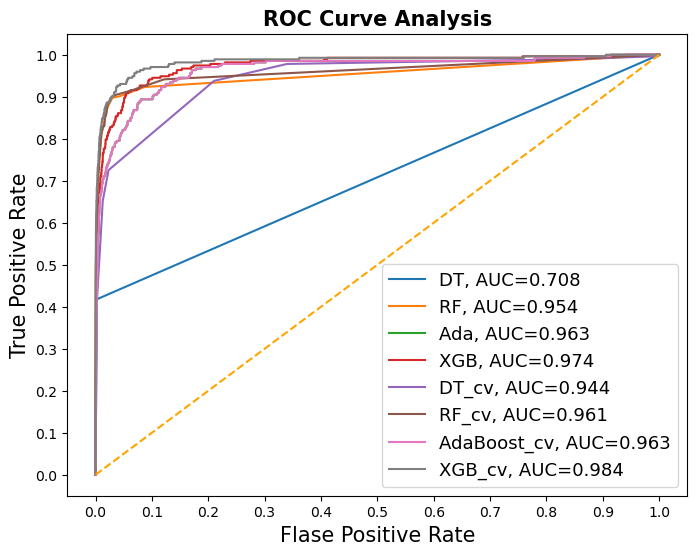

In [88]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()